In [2]:
from PIL import Image
img = Image.open("brain.tif")
img.load()

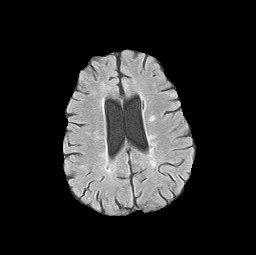

In [3]:
img

C:\Users\Bipasha Roy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  from ipykernel import kernelapp as app


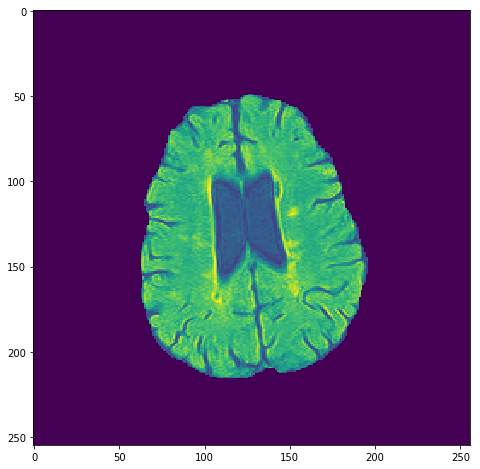

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import ndimage
from sklearn import cluster
import numpy as np
import time
import sys
import cv2

from skimage import data
from PIL import Image
img = Image.open('brain.tif')

#convert back and white image to rgb
img = ndimage.imread("brain.tif",flatten=True, mode='RGB')

#resize of the image
plt.figure(figsize = (15,8))

#display the colored image
plt.imshow(img)

#to save the image
plt.savefig('final.png')

In [4]:
img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [5]:
from __future__ import division, print_function, absolute_import

__all__ = ['imread']

from numpy import array


In [6]:
def imread(fname, flatten=False, mode=None):
    try:
        from PIL import Image
    except ImportError:
        raise ImportError("Could not import the Python Imaging Library (PIL)"
                          " required to load image files.  Please refer to"
                          " http://pypi.python.org/pypi/PIL/ for installation"
                          " instructions.")

    im = Image.open(fname)
    if mode:
        im = im.convert(mode)
    if flatten:
        im = im.convert('F')
    result = array(im)
    return plt.imshow(result)

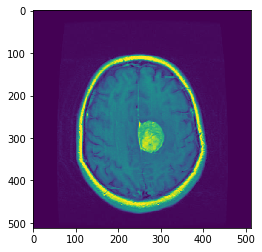

In [7]:
imread('tumor.jpg')


In [5]:
import cv2
import numpy as np
from PIL import Image
img = Image.open("out4.png")
img.load()

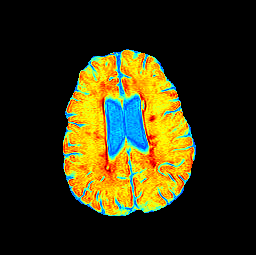

In [6]:
img

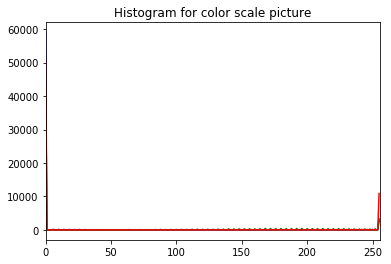

NameError: name 'k' is not defined

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('out4.png', -1)
#cv2.imshow('GoldenGate',img)

color = ('b','g','r')
for channel,col in enumerate(color):
    histr = cv2.calcHist([img],[channel],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Histogram for color scale picture')
plt.show()

while True:
    #k = cv2.waitKey(0) & 0xFF     
    if k == 27: break             # ESC key to exit 
cv2.destroyAllWindows()

[[ 190.]
 [   0.]
 [   0.]
 [   0.]
 [   0.]
 [ 176.]
 [   0.]
 [   0.]
 [   0.]
 [ 157.]
 [   0.]
 [   0.]
 [   0.]
 [ 148.]
 [   0.]
 [   0.]
 [   0.]
 [ 136.]
 [   0.]
 [   0.]
 [   0.]
 [ 117.]
 [   0.]
 [   0.]
 [   0.]
 [ 136.]
 [   0.]
 [   0.]
 [   0.]
 [ 105.]
 [   0.]
 [   0.]
 [   0.]
 [  84.]
 [   0.]
 [   0.]
 [   0.]
 [  84.]
 [   0.]
 [   0.]
 [   0.]
 [  77.]
 [   0.]
 [   0.]
 [   0.]
 [  57.]
 [   0.]
 [   0.]
 [   0.]
 [  61.]
 [   0.]
 [   0.]
 [   0.]
 [  61.]
 [   0.]
 [   0.]
 [   0.]
 [  63.]
 [   0.]
 [   0.]
 [   0.]
 [  45.]
 [   0.]
 [   0.]
 [   0.]
 [  47.]
 [   0.]
 [   0.]
 [   0.]
 [  43.]
 [   0.]
 [   0.]
 [   0.]
 [  41.]
 [   0.]
 [   0.]
 [   0.]
 [  50.]
 [   0.]
 [   0.]
 [   0.]
 [  48.]
 [   0.]
 [   0.]
 [   0.]
 [  47.]
 [   0.]
 [   0.]
 [   0.]
 [  37.]
 [   0.]
 [   0.]
 [   0.]
 [  27.]
 [   0.]
 [   0.]
 [   0.]
 [  38.]
 [   0.]
 [   0.]
 [   0.]
 [  39.]
 [   0.]
 [   0.]
 [   0.]
 [  47.]
 [   0.]
 [   0.]
 [   0.]
 [  36.]
 [   0.]
 

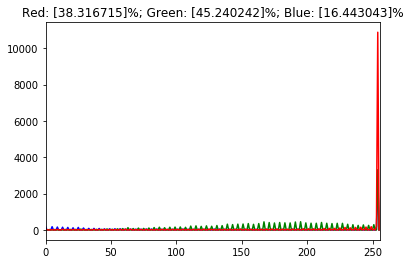

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import operator

img = cv2.imread('out4.png', -1)
cv2.imshow('Imagem:',img)

color = ('b','g','r')
qtdBlue = 0
qtdGreen = 0
qtdRed = 0
totalPixels = 0

for channel,col in enumerate(color):
    histr = cv2.calcHist([img],[channel],None,[256],[1,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
    totalPixels+=sum(histr)
    print (histr)
    if channel==0:
        qtdBlue = sum(histr)
    elif channel==1:
        qtdGreen = sum(histr)
    elif channel==2:
        qtdRed = sum(histr)

qtdBlue = (qtdBlue/totalPixels)*100
qtdGreen = (qtdGreen/totalPixels)*100
qtdRed = (qtdRed/totalPixels)*100

#qtdBlue = filter(operator.isNumberType, qtdBlue)
#qtdGreen = filter(operator.isNumberType, qtdGreen)
#qtdRed = filter(operator.isNumberType, qtdRed)

plt.title("Red: "+str(qtdRed)+"%; Green: "+str(qtdGreen)+"%; Blue: "+str(qtdBlue)+"%")
plt.show()

In [12]:
import numpy as np
import cv2

img = cv2.imread('color.png')

green = [60,179,113]  # RGB
diff = 20
boundaries = [([green[2]-diff, green[1]-diff, green[0]-diff],
               [green[2]+diff, green[1]+diff, green[0]+diff])]
# in order BGR as opencv represents images as numpy arrays in reverse order

for (lower, upper) in boundaries:
    lower = np.array(lower, dtype=np.uint8)
    upper = np.array(upper, dtype=np.uint8)
    mask = cv2.inRange(img, lower, upper)
    output = cv2.bitwise_and(img, img, mask=mask)

    ratio_green = cv2.countNonZero(mask)/(img.size/3)
    print('green pixel percentage:', np.round(ratio_green*100, 2))

    cv2.imshow("images", np.hstack([img, output]))
    cv2.waitKey(0)

green pixel percentage: 0.4


In [1]:
from __future__ import division
import cv2
import numpy as np
 
def nothing(*arg):
        pass

In [2]:
# Initial HSV GUI slider values to load on program start.
#icol = (36, 202, 59, 71, 255, 255)    # Green
#icol = (18, 0, 196, 36, 255, 255)  # Yellow
#icol = (89, 0, 0, 125, 255, 255)  # Blue
icol = (0, 100, 80, 10, 255, 255)   # Red
cv2.namedWindow('colorTest')
# Lower range colour sliders.
cv2.createTrackbar('lowHue', 'colorTest', icol[0], 255, nothing)
cv2.createTrackbar('lowSat', 'colorTest', icol[1], 255, nothing)
cv2.createTrackbar('lowVal', 'colorTest', icol[2], 255, nothing)
# Higher range colour sliders.
cv2.createTrackbar('highHue', 'colorTest', icol[3], 255, nothing)
cv2.createTrackbar('highSat', 'colorTest', icol[4], 255, nothing)
cv2.createTrackbar('highVal', 'colorTest', icol[5], 255, nothing)

In [ ]:
frame = cv2.imread('outputHSV.png')
 
while True:
    # Get HSV values from the GUI sliders.
    lowHue = cv2.getTrackbarPos('lowHue', 'colorTest')
    lowSat = cv2.getTrackbarPos('lowSat', 'colorTest')
    lowVal = cv2.getTrackbarPos('lowVal', 'colorTest')
    highHue = cv2.getTrackbarPos('highHue', 'colorTest')
    highSat = cv2.getTrackbarPos('highSat', 'colorTest')
    highVal = cv2.getTrackbarPos('highVal', 'colorTest')
 
    # Show the original image.
    cv2.imshow('frame', frame)
    
    # Blur methods available, comment or uncomment to try different blur methods.
    frameBGR = cv2.GaussianBlur(frame, (7, 7), 0)
    #frameBGR = cv2.medianBlur(frameBGR, 7)
    #frameBGR = cv2.bilateralFilter(frameBGR, 15 ,75, 75)
   
    # Show blurred image.
    cv2.imshow('blurred', frameBGR)

    # HSV (Hue, Saturation, Value).
    # Convert the frame to HSV colour model.
    hsv = cv2.cvtColor(frameBGR, cv2.COLOR_BGR2HSV)
    
    # HSV values to define a colour range.
    colorLow = np.array([lowHue,lowSat,lowVal])
    colorHigh = np.array([highHue,highSat,highVal])
    mask = cv2.inRange(hsv, colorLow, colorHigh)
    # Show the first mask
    cv2.imshow('mask-plain', mask)
 
    kernal = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernal)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernal)
    
    # Show morphological transformation mask
    cv2.imshow('mask', mask)
    
    # Put mask over top of the original image.
    result = cv2.bitwise_and(frame, frame, mask = mask)
 
    # Show final output image
    cv2.imshow('colorTest', result)

    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break
    
cv2.destroyAllWindows()